# Логрег на датасете Титаник
## 1. Загрузка библиотек и выборок

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from scorekit import DataSamples
from scorekit import WOE
from scorekit import LogisticRegressionModel

result_folder = 'titanic_output'
df = pd.read_csv('data/train_titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C


## 2. Автологрег

Chosen model classifier is SGDClassifier(alpha=0.001, loss='log', random_state=0)

---------------------------------------------------------------- Creating DataSamples ----------------------------------------------------------------

Selected features: ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Selected categorical features: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
Actual parts of samples:
Train: 0.6992
Test: 0.3008

------------------------------------------------------------------------ SFA -------------------------------------------------------------------------

Performing autobinning with parameters space of size 1...
Using parameters set 1/1: {'method': 'opt', 'max_n_bins': 10, 'min_bin_size': 0.05, 'criterion': 'entropy', 'scoring': 'neg_log_loss', 'max_depth': 5, 'solver': 'cp', 'divergence': 'iv', 'WOEM_on': True, 'WOEM_woe_threshold': 0.05, 'WOEM_with_missing': False, 'SM_on': False, 'SM_target_threshold': 5, 'SM_size_threshold': 100

100%|██████████| 8/8 [00:00<00:00, 17.34it/s]


Scorecard saved to the file titanic_auto/auto_fit_scorecard.xlsx
All done! 8/8 features successfully binned.
Transforming features...

------------------------------------------------------------------------ MFA -------------------------------------------------------------------------


---------------------------------------------- Step 1 ----------------------------------------------
Dropped features with gini lower 10: ['PassengerId_WOE']

---------------------------------------------- Step 2 ----------------------------------------------
Dropped correlated features: []

---------------------------------------------- Step 3 ----------------------------------------------
Stepwise feature selection started...
To add: Sex_WOE, gini: 52.935, p-value: 1.8592376132023526e-25
To add: Fare_WOE, gini: 66.924, p-value: 4.2986156123118663e-14
To add: SibSp_WOE, gini: 67.763, p-value: 0.004900569902258183
To add: Pclass_WOE, gini: 68.269, p-value: 3.135704030817236e-05
To add: Age_WOE, gini: 69

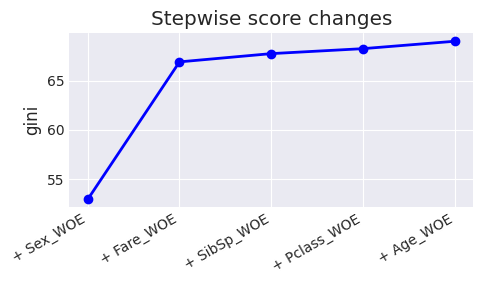


---------------------------------------------- Step 4 ----------------------------------------------
Dropping features with positive coefs and high p-values...
Nothing to drop

------------------------------------------- Final model --------------------------------------------
intercept = -0.224
coefs = {'SibSp_WOE': -0.624, 'Sex_WOE': -0.826, 'Pclass_WOE': -0.815, 'Fare_WOE': -0.377, 'Age_WOE': -0.852}
Generating report...


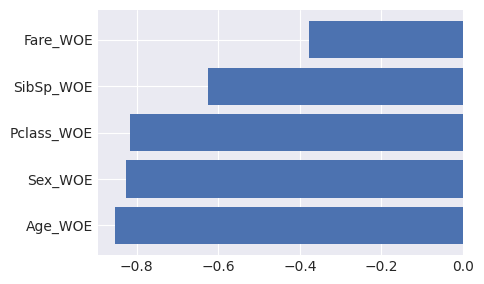

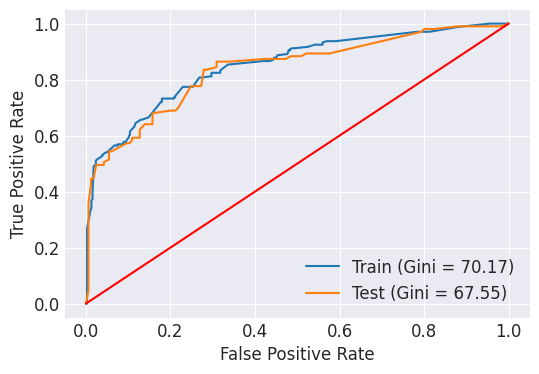

      Train   Test
Gini  70.17  67.55
The model was successfully saved to file titanic_auto/auto_model.json


In [2]:
LogisticRegressionModel().auto_logreg(df,                            # ДатаФрейм или ДатаСэмпл
                                      target='Survived',             # целевая переменная
                                      result_folder='titanic_auto',  # папка, в которую будут сохраняться все результаты работы
                                      time_column=None,              # дата среза
                                      id_column=None,                # уникальный в рамках среза айди наблюдения
                                      feature_descriptions=None,     # датафйрем с описанием переменных. Должен содержать индекс с названием переменных и любое кол-во полей с описанием, которые будут подтягиваться в отчеты
                                      n_jobs=3,                      # кол-во используемых рабочих процессов, при -1 берется число, равное CPU_LIMIT
                                      validate=False                 # флаг для выполнения валидацонных тестов 
                                     )

## 3. Предварительный анализ данных
### 3.1. Создание объекта DataSamples, содержащего все необходимые сэмплы и информацию о них
Исходная выборка не разбита на сэмплы, поэтому на этом этапе создаем объект с одним сэмплом, в который поместим всю выборку

In [3]:
ds = DataSamples(samples={'train': df},          # выборка для разработки. Задается в виде словаря {название_сэмпла: датафрейм}, может содержать любое кол-во сэмплов
                 target='Survived',              # целевая переменная
                 id_column='PassengerId',        # уникальный в рамках среза айди наблюдения
                 result_folder='titanic_output', # папка, в которую будут сохраняться все результаты работы с этим ДатаСэмплом
                 feature_descriptions=pd.read_excel('data/titanic_description.xlsx', index_col=0),  # датафрейм с описанием переменных. Должен содержать индекс с названием переменных и любое кол-во полей с описанием, которые будут подтягиваться в отчеты
                 features=None,                  # список переменных. При None берутся все поля числового типа и нечисловые (кроме target, time_column, id_column, weights) с кол-вом уникльных значений меньше min_nunique
                 cat_columns=None,               # список категориальных переменных. При None категориальными считаются все переменные с кол-вом уникальных значений меньше min_nunique
                 min_nunique=30,                 # кол-во уникальных значений, до которого переменная считается категориальной при автоматическом определении
                 time_column=None,               # дата среза
                 train_name=None,                # название сэмпла обучающей выборки. При None берется первый сэмпл
                 special_bins=None,              # словарь вида {название бина: значение}, каждое из значений которого помещается в отдельный бин
                 n_jobs=1,                       # кол-во используемых рабочих процессов, при -1 берется число, равное CPU_LIMIT
                 random_state=0,                 # сид для генератора случайных чисел, используется во всех остальных методах, где необходимо
                 samples_split=None,             # словарь с параметрами для вызова метода self.samples_split
                 bootstrap_split=None            # словарь с параметрами для вызова метода self.bootstrap_split
                 )

Selected features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Selected categorical features: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


### 3.2. Разбиение на сэмплы

In [4]:
ds.samples_split(df=None,                        # датафрейм из которого нарезаются сэмплы. При None берется self.samples[self.train_name]
                 test_size=0.2,                  # размер сэмпла test
                 validate_size=0,                # размер сэмпла validate
                 split_type='oos',               # тип разбиения 'oos' = 'out-of-sample', 'oot' = 'out-of-time'
                 stratify=True,                  # стратификация по целевой переменной. Только для split_type='oos'
                 id_column=None                  # название поля с айди. Если задано, то все одинаковые айди распределяются в один сэмпл,
                )                                #      в случае split_type='oot' из теста исключаются айди, присутсвующие в трэйне. Размер теста при этом может стать сильно меньше test_size                 )

Actual parts of samples:
train: 0.7991
Test: 0.2009


### 3.3. Генерация сэмплов для бутстрэпа

In [5]:
ds.bootstrap_split(df,                           # датафрейм, основа для нарезания подвыборок
                   bootstrap_part=1.5,           # размер каждой подвыборки
                   bootstrap_number=100,         # кол-во подвыборок
                   stratify=True,                # стратификация каждой подвыборки по целевой переменной
                   replace=True,                 # разрешается ли повторять каждое наблюдение множество раз в подвыборке
                  )

### 3.4. Расчет статистики по сэмплам

In [6]:
ds.stats(out='sample_stats.xlsx',                # название эксель файла для сохранения статистики
         gini_in_time=False,                     # флаг для расчета динамики джини по срезам. На больших выборках с бутстрэпом может занимать много времени
         targettrend='TargetTrend'               # название папки и листа в файле для сохранения графиков TargetTrend. При None TargetTrend не считается
         )

Statistics saved in the file titanic_output/sample_stats.xlsx.
                      train   Test
amount                  712    179
target                  273     69
target_rate           0.383  0.385
period                   NA     NA
features                  7      7
categorical features      5      5


## 4. Однофакторный анализ
### 4.1. Создание объекта WOE, содержащего параметры для расчета WOE и биннинги всех переменных
В общем виде WOE в каждом бине i вычисляется по следующей формуле:

$\large {WOE_i = ln\frac{ER \cdot (n + alpha)}{n \cdot ER_i + alpha}}, \\
\
\large {ER = \frac{n_1}{n_0}}, \\
\
\large {ER_i = \frac{n_{1i}+woe\_adjust}{n_{0i}+woe\_adjust}},
$

где $n$ - общее кол-во наблюдений в выборке, 

$n_1$ - общее кол-во наблюдений класса 1, 

$n_0$ - общее кол-во наблюдений класса 0, 

$n_{1i}$ - кол-во наблюдений класса 1 в бине i, 

$n_{0i}$ - кол-во наблюдений класса 0 в бине i, 

$alpha$ и $woe\_adjust$ - коэффициент регуляризации и корректировочная поправка

In [7]:
binning = WOE(ds,                                # ДатаСэмпл, для которого будут рассчитываться биннинги
              features=None,                     # список переменных. При None берется ds.features
              scorecard=None,                    # путь к эксель файлу или датафрейм с готовыми биннингами для импорта
              round_digits=3,                    # округление границ бинов до этого числа знаков после запятой.
                                                 # При округлении происходит проверка на долю мигрирующих наблюдений. Если округление приедет к миграции большой доли наблюдений,
                                                 # то round_digits увеличивается до тех пор, пока доля не упадет ниже rounding_migration_coef
              rounding_migration_coef=0.005,     # максимально допустимая доля наблюдений для миграции между бинами при округлении
              # ---Параметры для расчета WOE---
              simple=True,                       # если True, то расчет WOE происходит на трэйн сэмпле, иначе берется среднее значение по фолдам
              n_folds=5,                         # кол-во фолдов для расчета WOE при simple=False
              woe_adjust=0.5,                    # корректировочный параметр для расчета EventRate_i в бине i                                                
              alpha=0,                           # коэффициент регуляризации для расчета WOE
              alpha_range=None,                  # если alpha=None, то подбирается оптимальное значение alpha из диапазона alpha_range. При None берется диапазон range(10, 100, 10)
              alpha_scoring='neg_log_loss',      # метрика, используемая для оптимизации alpha
              alpha_best_criterion='min',        # 'min' - минимизация метрики alpha_scoring, 'max' - максимизация метрики
              missing_process='max_or_separate', # способ обработки пустых значений:
                                                 #     'separate' - помещать в отдельный бин
                                                 #     'min' - объединять с бином с минимальным WOE
                                                 #     'max' - объединять с бином с максимальным WOE
                                                 #     'nearest' - объединять с ближайшим по WOE биномом
                                                 #     'min_or_separate' - если доля пустых значений меньше missing_min_part, то объединять с бином с минимальным WOE, иначе помещать в отдельный бин
                                                 #     'max_or_separate' - если доля пустых значений меньше missing_min_part, то объединять с бином с максимальным WOE, иначе помещать в отдельный бин
                                                 #     'nearest_or_separate' - если доля пустых значений меньше missing_min_part, то объединять с ближайшим по WOE бином, иначе помещать в отдельный бин
              missing_min_part=0.01,             # минимальная доля пустых значений для выделения отдельного бина при missing_process 'min_or_separate', 'max_or_separate' или 'nearest_or_separate'
              others='missing_or_max',           # Способ обработки значений, не попавших в биннинг:
                                                 #     'min': остальным значениям присваивается минимальный WOE
                                                 #     'max': остальным значениям присваивается максимальный WOE
                                                 #     'missing_or_min': если есть бакет с пустыми значениями, то остальным значениям присваивается его WOE, иначе минимальный WOE
                                                 #     'missing_or_max': если есть бакет с пустыми значениями, то остальным значениям присваивается его WOE, иначе максимальный WOE
                                                 #     float: отсутствующим значениям присваивается заданный фиксированный WOE
              opposite_sign_to_others=True,      # В случае, когда непрерывная переменная на выборке для разработки имеет только один знак,
                                                 # то все значения с противоположным знаком относить к others
             )

### 4.2. Поиск оптимального биннинга
Итерационно для каждой переменной выполняются следующие шаги: <br>
 1) Исходное разбиение на n бинов, где n берется последовательно из списка groups_range <br>
 2) Выполняются слияния соседних бинов с близким WOE (при выставленном флаге WOEM_on=True) и малых бинов (SM_on=True) <br>
 3) Проводятся проверки на джини (G_on=True), порядок (WOEO_on=True) и бизнес-логику (BL_on=True) <br>
 4) Если любая из проверок проваливается, то возвращаемся на шаг 1 и берем следующее значение из groups_range <br>
 
Если после перебора всех n проверки так и не успешны, то переменная исключается из списка. <br>
В случае, если задан params_space, то вся процедура повторяется для каждого набора параметров и затем выбирается биннинг с наибольшим джини.



------------------------------------------------------------------------ SFA -------------------------------------------------------------------------

Performing autobinning with parameters space of size 1...
Using parameters set 1/1: {'method': 'opt', 'max_n_bins': 10, 'min_bin_size': 0.05, 'criterion': 'entropy', 'scoring': 'neg_log_loss', 'max_depth': 5, 'solver': 'cp', 'divergence': 'iv', 'WOEM_on': True, 'WOEM_woe_threshold': 0.1, 'WOEM_with_missing': False, 'SM_on': False, 'SM_target_threshold': 10, 'SM_size_threshold': 100, 'G_on': True, 'G_gini_threshold': 5, 'G_gini_decrease_threshold': 0.5, 'G_gini_increase_restrict': False, 'G_with_test': True, 'WOEO_on': True, 'WOEO_dr_threshold': 0.01, 'WOEO_correct_threshold': 0.9, 'WOEO_miss_is_incorrect': True, 'WOEO_with_test': False, 'BL_on': True, 'BL_allow_Vlogic_to_increase_gini': 10}
Processing 7 features on 1 CPU...


  0%|          | 0/7 [00:00<?, ?it/s]


------------------------------------- Auto binning for Pclass --------------------------------------


--------------- Searching for the best split into 10 groups ---------------


Current binning:
 group values    woe   n  n1
     0    [3]  0.722 389  90
     1    [2] -0.449 150  74
     2    [1] -1.004 173 109


----------------- Merging by WOE -----------------
No groups with close WOE.
...Done

------------- Business logic checks --------------
Categorical feature. Skipping trend check...
...Passed!

------------------ Gini checks -------------------
      train   Test  Bootstrap mean  Bootstrap std
Gini   38.1  29.06           36.13           2.51
...Passed!

---------------- WOE order checks ----------------


 14%|█▍        | 1/7 [00:02<00:12,  2.05s/it]

Trend holding on 100/100 bootstrap samples, threshold = 0.9
...Passed!

--------------------------------------- Auto binning for Sex ---------------------------------------


--------------- Searching for the best split into 10 groups ---------------


Current binning:
 group     values    woe   n  n1
     0   ['male']  0.993 461  86
     1 ['female'] -1.542 251 187


----------------- Merging by WOE -----------------
No groups with close WOE.
...Done

------------- Business logic checks --------------
Categorical feature. Skipping trend check...
...Passed!

------------------ Gini checks -------------------
      train   Test  Bootstrap mean  Bootstrap std
Gini  53.92  51.21           53.68           2.33
...Passed!

---------------- WOE order checks ----------------


 29%|██▊       | 2/7 [00:04<00:10,  2.03s/it]

Trend holding on 100/100 bootstrap samples, threshold = 0.9
...Passed!

--------------------------------------- Auto binning for Age ---------------------------------------


--------------- Searching for the best split into 10 groups ---------------


Current binning:
 group        values    woe   n  n1
    -1           nan  0.425 146  42
     0      [0, 5.5] -0.986  35  22
     1   [5.5, 18.5] -0.227  80  35
     2  [18.5, 21.5]  0.599  52  13
     3 [21.5, 30.75] -0.036 161  63
     4 [30.75, 47.5] -0.086 171  69
     5   [47.5, inf] -0.209  67  29


----------------- Merging by WOE -----------------

Merging of two groups close by WOE: [3, 4]

Current binning:
 group       values    woe   n  n1
    -1          nan  0.425 146  42
     0     [0, 5.5] -0.986  35  22
     1  [5.5, 18.5] -0.227  80  35
     2 [18.5, 21.5]  0.599  52  13
     3 [21.5, 47.5] -0.061 332 132
     4  [47.5, inf] -0.209  67  29

No groups with close WOE.
...Done

------------- Business logic checks ----------

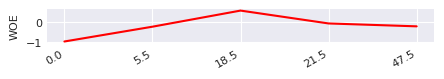

...Passed!

------------------ Gini checks -------------------
      train   Test  Bootstrap mean  Bootstrap std
Gini  17.29  13.62           16.58           2.52
...Passed!

---------------- WOE order checks ----------------
Trend holding on 73/100 bootstrap samples, threshold = 0.9
...Failed!

--------------- Searching for the best split into 5 groups ----------------


Current binning:
 group       values    woe   n  n1
    -1          nan  0.425 146  42
     0     [0, 5.5] -0.986  35  22
     1  [5.5, 42.5] -0.055 434 172
     2 [42.5, 47.5]  0.498  30   8
     3  [47.5, inf] -0.209  67  29


----------------- Merging by WOE -----------------
No groups with close WOE.
...Done

------------- Business logic checks --------------
WOE trend is V-shaped


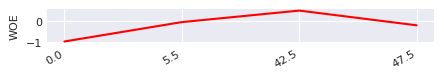

...Passed!

------------------ Gini checks -------------------
      train   Test  Bootstrap mean  Bootstrap std
Gini  14.68  18.76            15.3           2.54
...Passed!

---------------- WOE order checks ----------------
Trend holding on 99/100 bootstrap samples, threshold = 0.9
...Passed!
Business logic is V-shaped, keep iterating to compare with the monotonic trend.

--------------- Searching for the best split into 3 groups ----------------


Current binning:
 group      values    woe   n  n1
    -1         nan  0.425 146  42
     0    [0, 5.5] -0.986  35  22
     1 [5.5, 55.5] -0.064 502 200
     2 [55.5, inf]  0.294  29   9


----------------- Merging by WOE -----------------
No groups with close WOE.
...Done

------------- Business logic checks --------------
WOE trend is monotonic


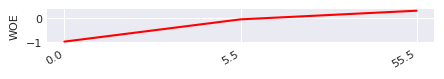

...Passed!

------------------ Gini checks -------------------
      train  Test  Bootstrap mean  Bootstrap std
Gini  13.02  16.9            13.9           2.38
...Passed!

---------------- WOE order checks ----------------


 43%|████▎     | 3/7 [00:10<00:16,  4.11s/it]

Trend holding on 96/100 bootstrap samples, threshold = 0.9
...Passed!

-------------------------------------- Auto binning for SibSp --------------------------------------


--------------- Searching for the best split into 10 groups ---------------


Current binning:
 group       values    woe   n  n1
     0 [3, 4, 5, 8]  1.165  39   6
     1          [0]  0.180 486 166
     2       [1, 2] -0.635 187 101


----------------- Merging by WOE -----------------
No groups with close WOE.
...Done

------------- Business logic checks --------------
Categorical feature. Skipping trend check...
...Passed!

------------------ Gini checks -------------------
      train  Test  Bootstrap mean  Bootstrap std
Gini  20.38  13.6           19.35           2.53
...Passed!

---------------- WOE order checks ----------------


 57%|█████▋    | 4/7 [00:12<00:09,  3.29s/it]

Trend holding on 100/100 bootstrap samples, threshold = 0.9
...Passed!

-------------------------------------- Auto binning for Parch --------------------------------------


--------------- Searching for the best split into 10 groups ---------------


Current binning:
 group       values    woe   n  n1
     0 [0, 4, 5, 6]  0.171 553 190
     1          [2] -0.507  61  31
     2       [1, 3] -0.596  98  52


----------------- Merging by WOE -----------------

Merging of two groups close by WOE: [2, 1]

Current binning:
 group       values    woe   n  n1
     0 [0, 4, 5, 6]  0.171 553 190
     1    [2, 1, 3] -0.563 159  83

No groups with close WOE.
...Done

------------- Business logic checks --------------
Categorical feature. Skipping trend check...
...Passed!

------------------ Gini checks -------------------
      train   Test  Bootstrap mean  Bootstrap std
Gini  13.09  18.96           14.58           2.54
...Passed!

---------------- WOE order checks ----------------


 71%|███████▏  | 5/7 [00:14<00:05,  2.88s/it]

Trend holding on 100/100 bootstrap samples, threshold = 0.9
...Passed!

-------------------------------------- Auto binning for Fare ---------------------------------------


--------------- Searching for the best split into 10 groups ---------------


Current binning:
 group           values    woe   n  n1
     0       [0, 7.404]  1.360  68   9
     1  [7.404, 10.481]  0.814 205  44
     2 [10.481, 25.927] -0.095 180  73
     3  [25.927, 50.74] -0.167 130  55
     4     [50.74, inf] -1.378 129  92


----------------- Merging by WOE -----------------

Merging of two groups close by WOE: [2, 3]

Current binning:
 group          values    woe   n  n1
     0      [0, 7.404]  1.360  68   9
     1 [7.404, 10.481]  0.814 205  44
     2 [10.481, 50.74] -0.124 310 128
     3    [50.74, inf] -1.378 129  92

No groups with close WOE.
...Done

------------- Business logic checks --------------
WOE trend is monotonic


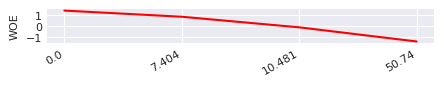

...Passed!

------------------ Gini checks -------------------
      train   Test  Bootstrap mean  Bootstrap std
Gini  41.68  31.77           39.73           2.47
...Passed!

---------------- WOE order checks ----------------


 86%|████████▌ | 6/7 [00:17<00:02,  2.70s/it]

Trend holding on 100/100 bootstrap samples, threshold = 0.9
...Passed!

------------------------------------ Auto binning for Embarked -------------------------------------


--------------- Searching for the best split into 10 groups ---------------


Current binning:
 group values    woe   n  n1
     0  ['S']  0.151 520 181
     1  ['Q']  0.019  61  23
     2  ['C'] -0.581 131  69


----------------- Merging by WOE -----------------
No groups with close WOE.
...Done

------------- Business logic checks --------------
Categorical feature. Skipping trend check...
...Passed!

------------------ Gini checks -------------------
      train   Test  Bootstrap mean  Bootstrap std
Gini  11.92  26.57           15.27           2.56
...Passed!

---------------- WOE order checks ----------------


100%|██████████| 7/7 [00:19<00:00,  2.75s/it]

Trend holding on 90/100 bootstrap samples, threshold = 0.9
...Passed!


Scorecard saved to the file titanic_output/auto_fit_scorecard.xlsx
Plotting binnings...


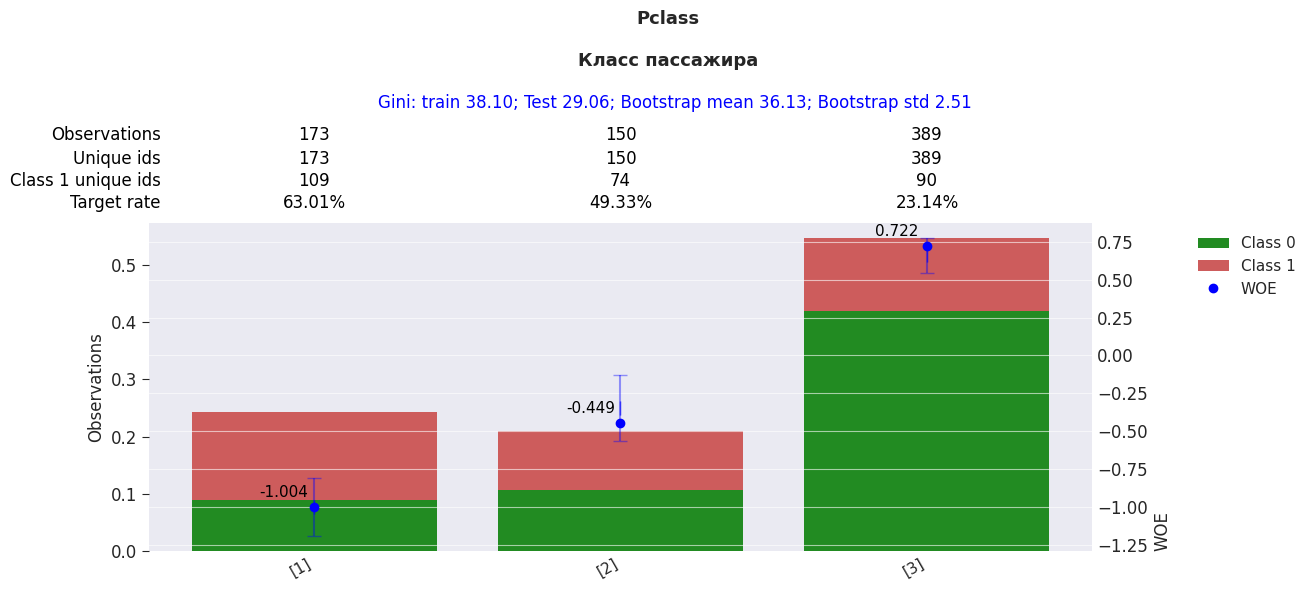

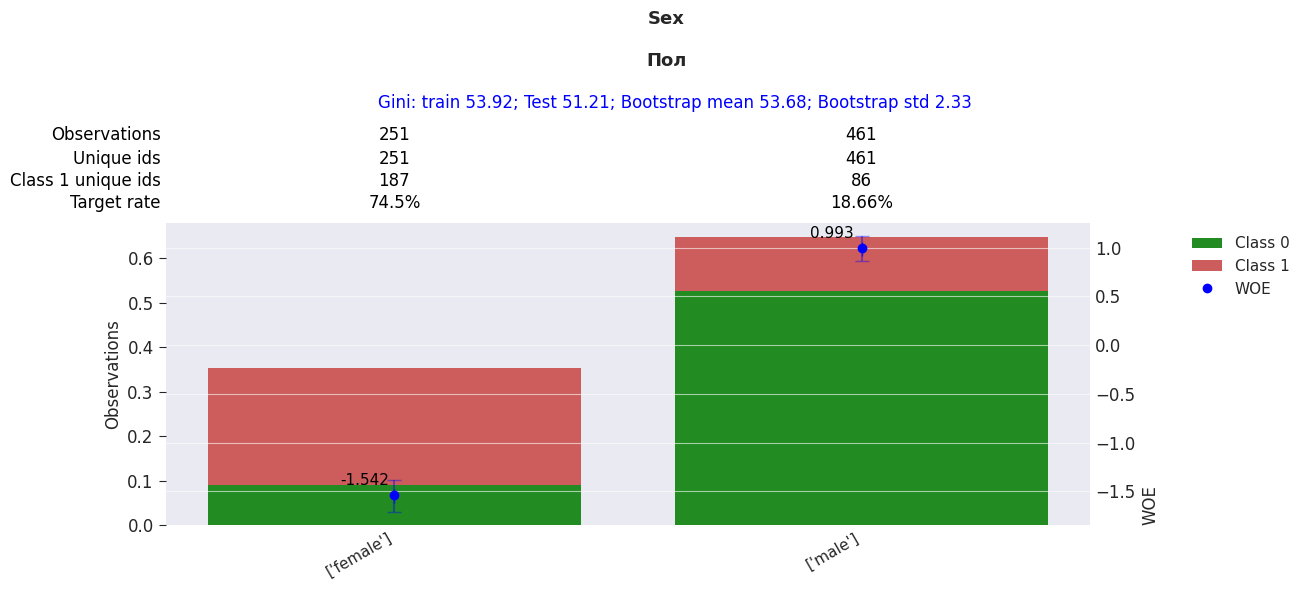

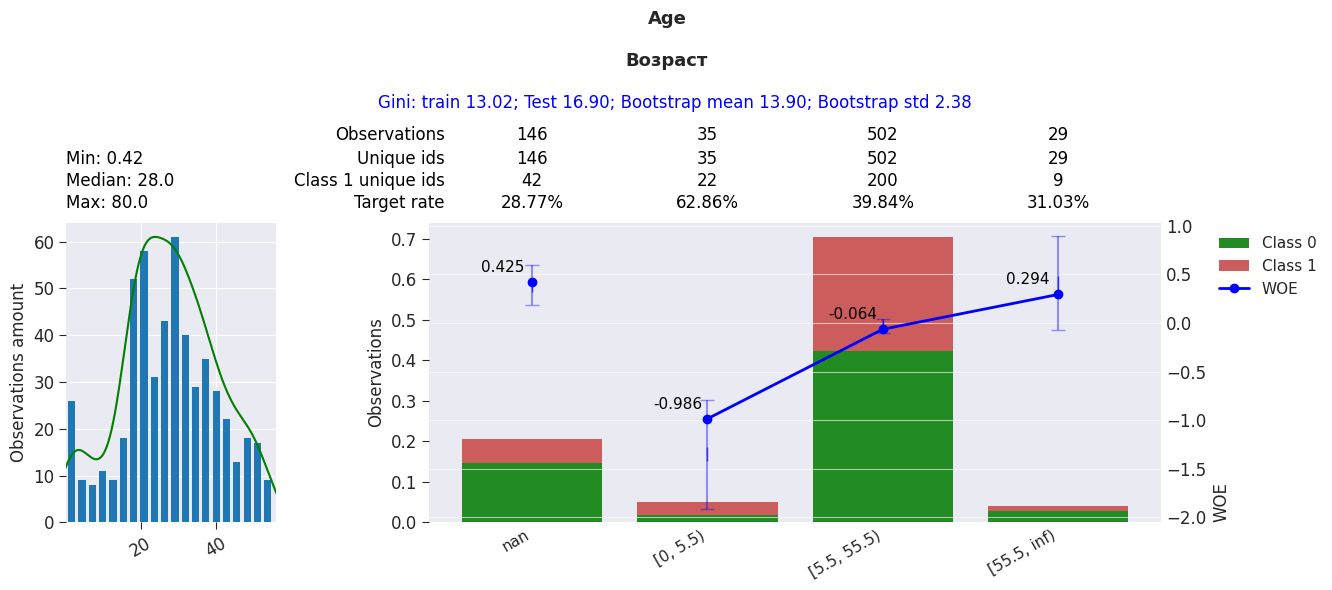

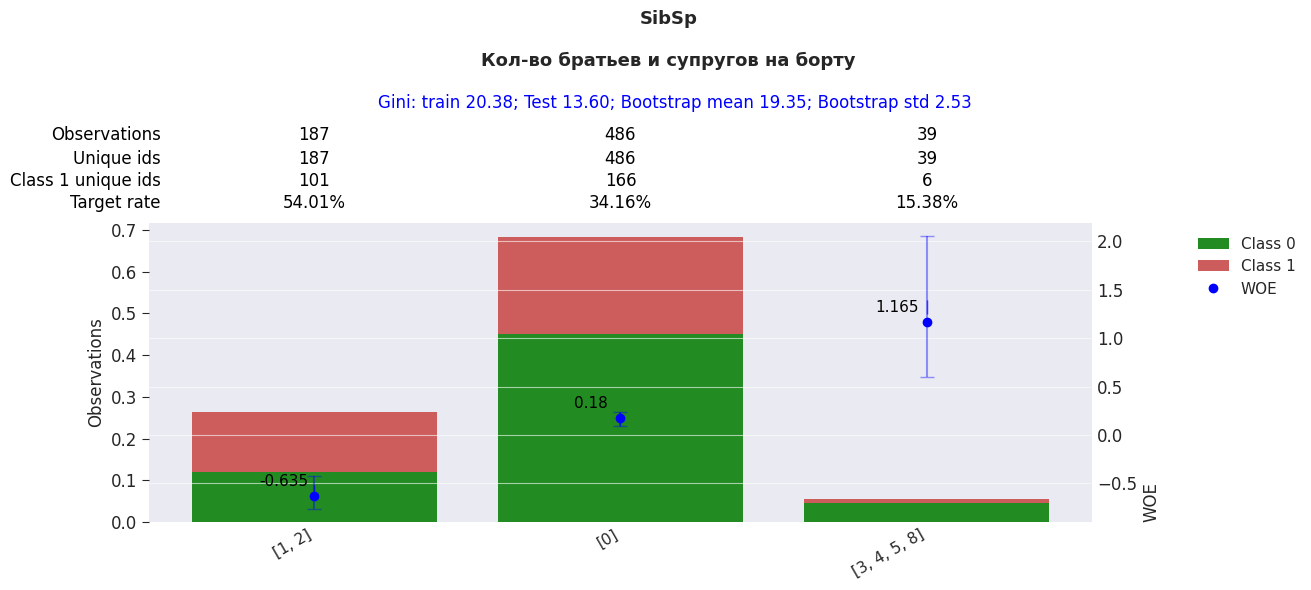

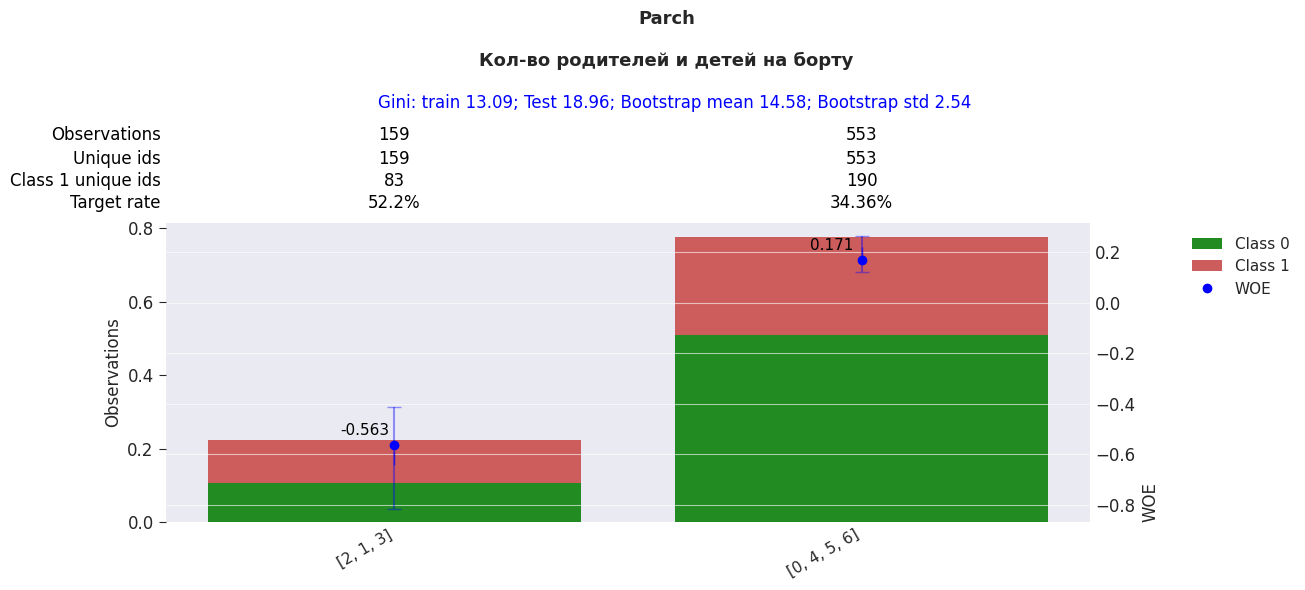

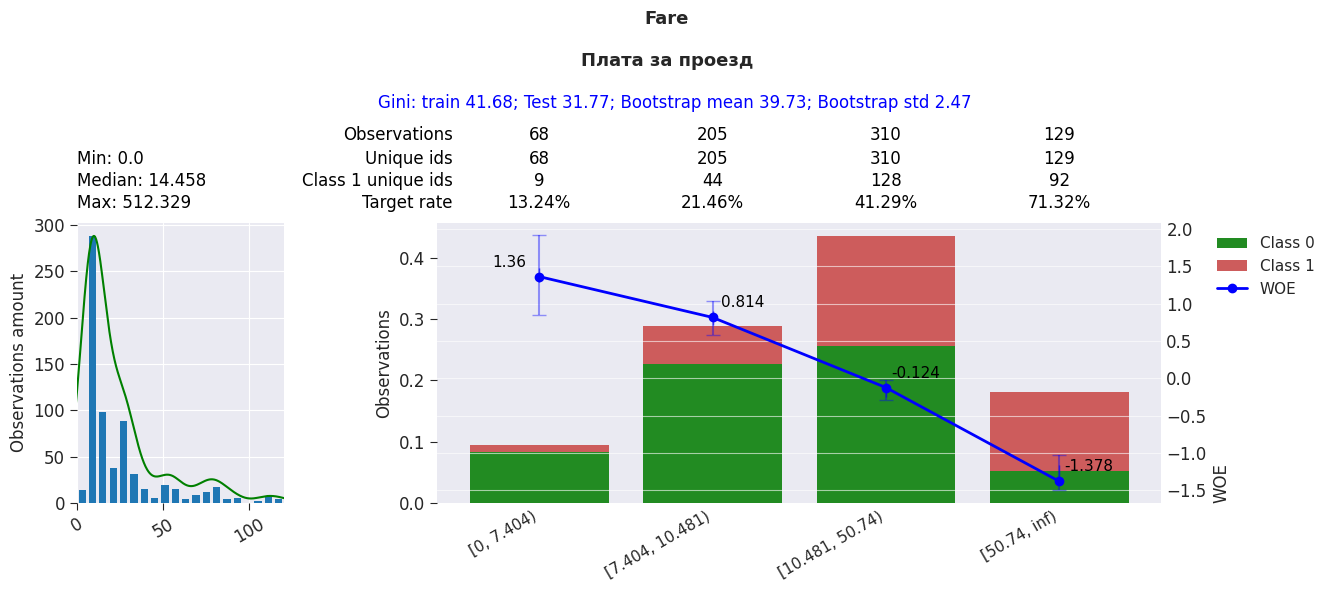

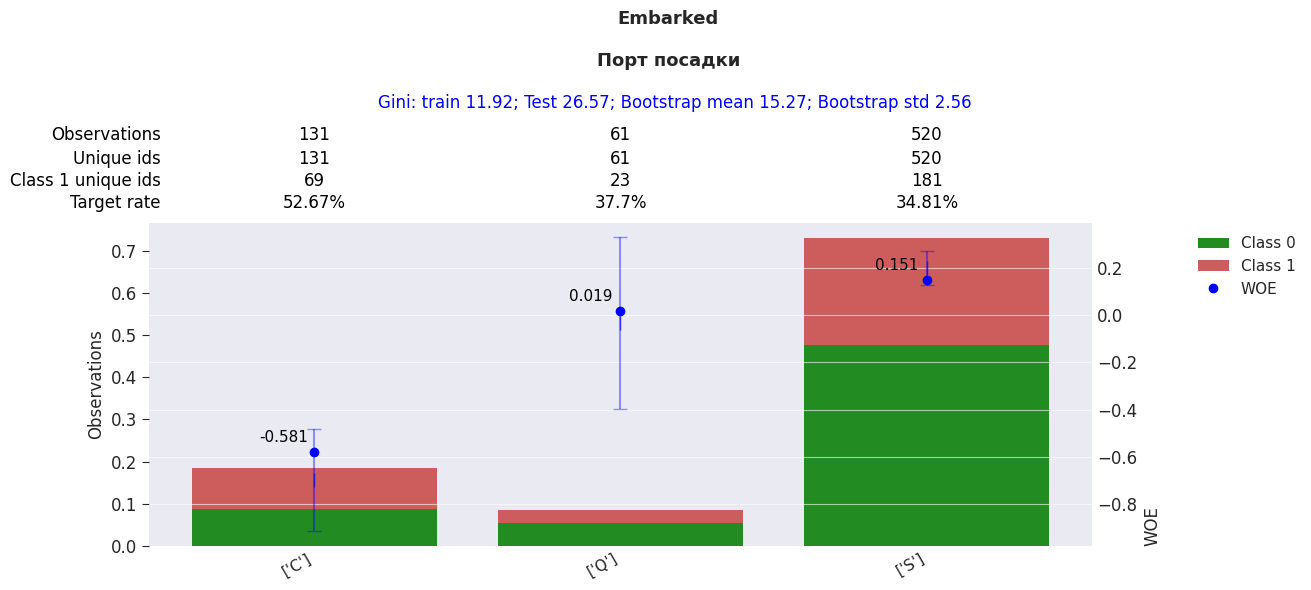

All done! 7/7 features successfully binned.


In [8]:
binning.auto_fit(features=None,                  # список переменных для обработки. По умолчанию берутся из self.ds.features
                 autofit_folder='auto_fit',      # название папки, в которую будут сохранены результаты автобиннинга
                 plot_flag=True,                 # флаг для вывода графиков с биннингом:
                                                 #   -1 - графики не строить
                                                 #    0, False - графики сохранить в папку autofit_folder/Figs_binning, но не выводить в аутпут
                                                 #    1, True - графики сохранить в папку autofit_folder/Figs_binning и вывести в аутпут
                 verbose=True,                   # флаг для вывода подробны комментариев в процессе работы
                 
                 # --- Метод биннинга ---
                 method='opt',                   # 'tree' - биннинг деревом, 'opt' - биннинг деревом с последующей оптимизацией границ бинов библиотекой optbinning
                 max_n_bins=10,                  # максимальное кол-во бинов
                 min_bin_size=0.05,              # минимальное число (доля) наблюдений в каждом листе дерева.
                                                 #    Если min_bin_size < 1, то трактуется как доля наблюдений от обучающей выборки
                 
                 # --- Параметры биннинга для метода 'tree' ---
                 criterion='entropy',            # критерий расщепления. Варианты значений: 'entropy', 'gini'
                 scoring='neg_log_loss',         # метрика для оптимизации
                 max_depth=5,                    # максимальная глубина дерева
                 
                 #--- Параметры биннинга для метода 'opt' ---
                 solver='cp',                    # солвер для оптимизации биннинга:
                                                 #   'cp' - constrained programming
                                                 #   'mip' - mixed-integer programming
                                                 #   'ls' - LocalSorver (www.localsorver.com)
                 divergence='iv',                # метрика для максимизации:
                                                 #   'iv' - Information Value,
                                                 #   'js' - Jensen-Shannon,
                                                 #   'hellinger' - Hellinger divergence,
                                                 #   'triangular' - triangular discrimination

                 # --- Параметры проверок ---
                 WOEM_on=True,                   # флаг проверки на разницу WOE между соседними группами
                 WOEM_woe_threshold=0.1,         # если дельта WOE между соседними группами меньше этого значения, то группы объединяются
                 WOEM_with_missing=False,        # должна ли выполняться проверка для бина с пустыми значениями
                 SM_on=False,                    # проверка на размер бина
                 SM_target_threshold=10,         # минимальное кол-во (доля) наблюдений с целевым событием в бине
                 SM_size_threshold=100,          # минимальное кол-во (доля) наблюдений в бине
                 BL_on=True,                     # флаг проверки на бизнес-логику
                 BL_allow_Vlogic_to_increase_gini=10, # разрешить V-образную бизнес-логику, если она приводит к увеличению джини переменной на эту величину относительного монотонного тренда.
                                                 #        При значении 100 V-образная бизнес-логика запрещена
                 G_on=True,                      # флаг проверки на джини
                 G_gini_threshold=5,             # минимальное допустимое джини переменной.
                                                 #    Проверяется на трэйн сэмпле, + если заданы бутстрэп сэмплы, то проверяется условие mean-1.96*std > G_gini_threshold
                 G_with_test=True,               # так же проверять джини на остальных доступных сэмплах
                 G_gini_decrease_threshold=0.5,  # допустимое уменьшение джини на всех сэмплах относительно трэйна.
                                                 # В случае, если значение >= 1, то проверяется условие gini(train) - gini(sample) <= G_gini_decrease_threshold для основных сэмплов
                                                 #                                                    и 1.96*std <= G_gini_decrease_threshold для бутсрэп сэмплов
                                                 # если значение < 1, то проверяется условие 1 - gini(sample)/gini(train) <= G_gini_decrease_threshold для основных сэмплов
                                                 #                                         и 1.96*std/mean <= G_gini_decrease_threshold для бутсрэп сэмплов
                 G_gini_increase_restrict=False, # так же ограничение действует и на увеличение джини
                 WOEO_on=True,                   # флаг проверки на сохранения порядка WOE на бутстрэп-сэмплах
                 WOEO_dr_threshold=0.01,         # допустимая дельта между TargetRate бинов для прохождения проверки, в случае нарушения порядка
                 WOEO_correct_threshold=0.90,    # доля бутстрэп-сэмплов, на которых должна проходить проверка
                 WOEO_miss_is_incorrect=True,    # считать ли отсутствие данных в бине сэмпла ошибкой или нет
                 WOEO_with_test=False,           # так же проверять тренд на остальных доступных сэмплах

                 # ---Пространство параметров---
                 params_space=None,              # пространство параметров, с которыми будут выполнены автобиннинги. Задается в виде словаря {параметр: список значений}
                 woe_best_samples=None,          # список сэмплов, джини которых будет учитываться при выборе лучшего биннинга. По умолчанию берется джини на трэйне
                 
                 #--- Кросс переменные ---
                 cross_features_first_level=None,# список переменных первого уровня для которых будут искаться лучшие кросс пары. При None берется features
                 cross_num_second_level=0        # кол-во кросс пар, рассматриваемых для каждой переменной первого уровня
                                                 #   0 - поиск не производится
                                                 #  -1 - рассматриваются все возможные кросс пары
                                                 #   n - для каждой переменной первого уровня отбираются n лучших переменных с максимальной метрикой criterion
                )

### 4.3. Ручные корректировки
#### 4.3.1 Отображение истории биннинга

Iteration 0


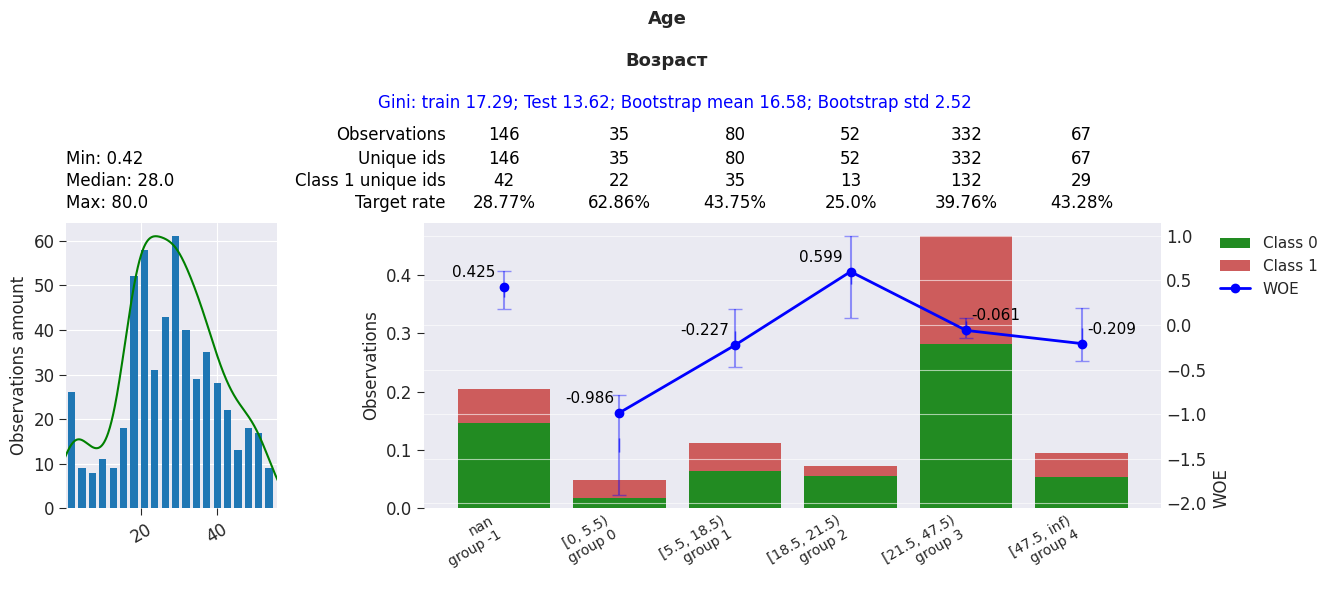

Iteration 1


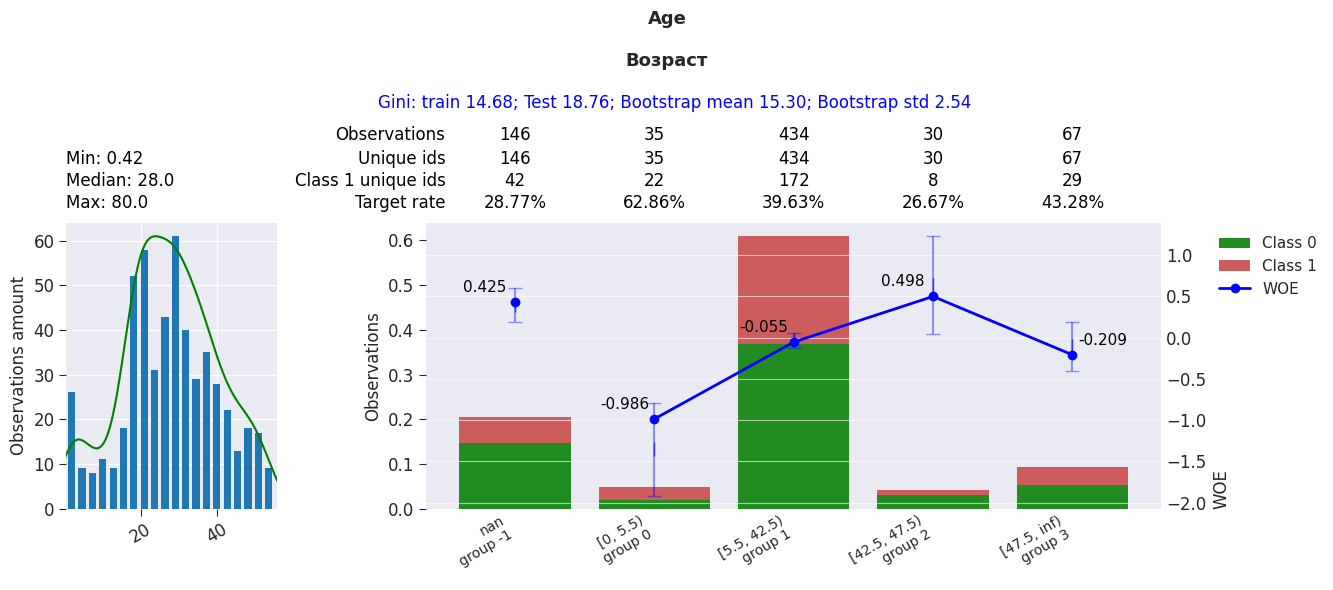

Iteration 2 (current)


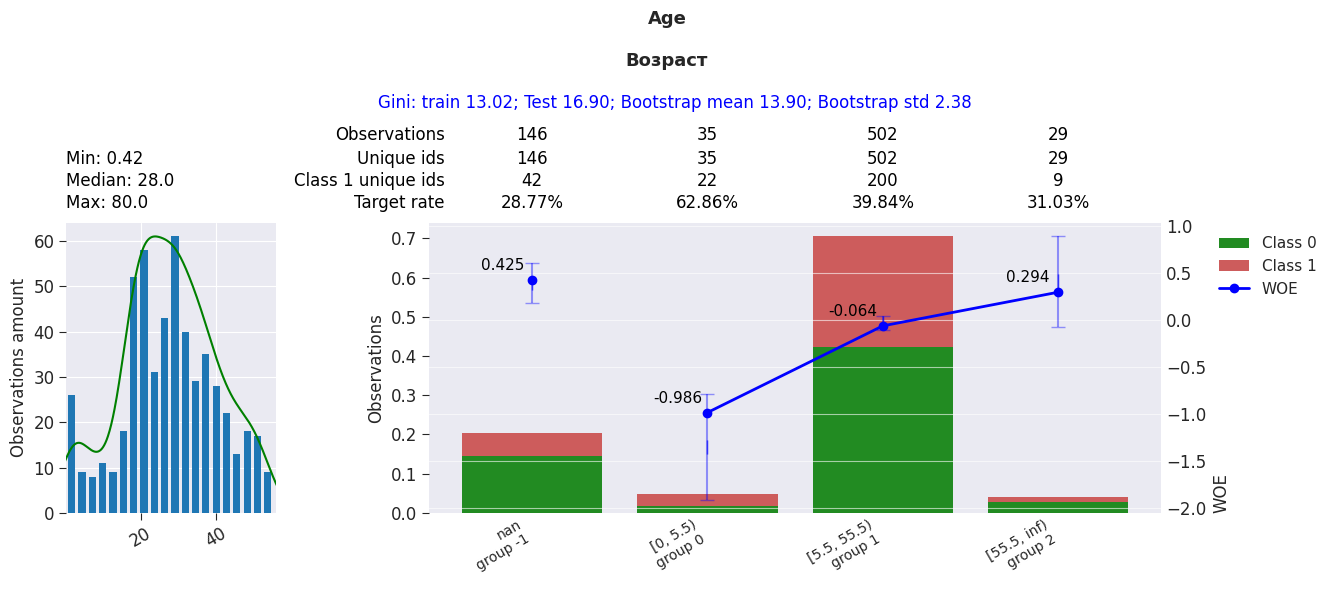

In [9]:
binning.show_history('Age')

#### 4.3.2 Расчет нового биннинга с большим числом бинов

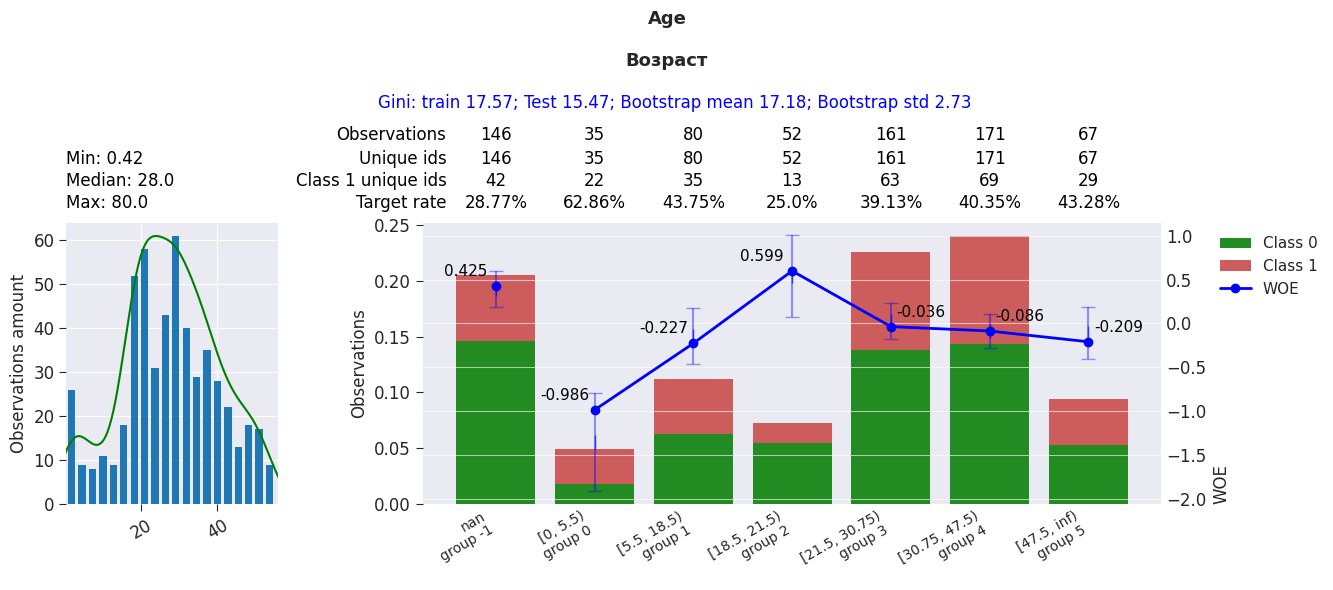

In [10]:
binning.fit(features=['Age'],               # список переменных для обработки. По умолчанию берутся из self.ds.features
            new_groups=True,                # False - пересчитаются только WOE в биних, True - также пересчитываются и границы бинов
            plot_flag=True,                 # флаг для вывода графиков с биннингом
            # --- Метод биннинга ---
            method='opt',                   # 'tree' - биннинг деревом, 'opt' - биннинг деревом с последующей оптимизацией границ бинов библиотекой optbinning
            max_n_bins=10,                  # максимальное кол-во бинов
            min_bin_size=0.05,              # минимальное число (доля) наблюдений в каждом листе дерева.
                                            #    Если min_bin_size < 1, то трактуется как доля наблюдений от обучающей выборки

            # --- Параметры биннинга для метода 'tree' ---
            criterion='entropy',            # критерий расщепления. Варианты значений: 'entropy', 'gini'
            scoring='neg_log_loss',         # метрика для оптимизации
            max_depth=5,                    # максимальная глубина дерева

            #--- Параметры биннинга для метода 'opt' ---
            solver='cp',                    # солвер для оптимизации биннинга:
                                            #   'cp' - constrained programming
                                            #   'mip' - mixed-integer programming
                                            #   'ls' - LocalSorver (www.localsorver.com)
            divergence='iv',                # метрика для максимизации:
                                            #   'iv' - Information Value,
                                            #   'js' - Jensen-Shannon,
                                            #   'hellinger' - Hellinger divergence,
                                            #   'triangular' - triangular discrimination
            )


#### 4.3.3 Объединение бинов 4 и 5

Age : merging [4, 5]


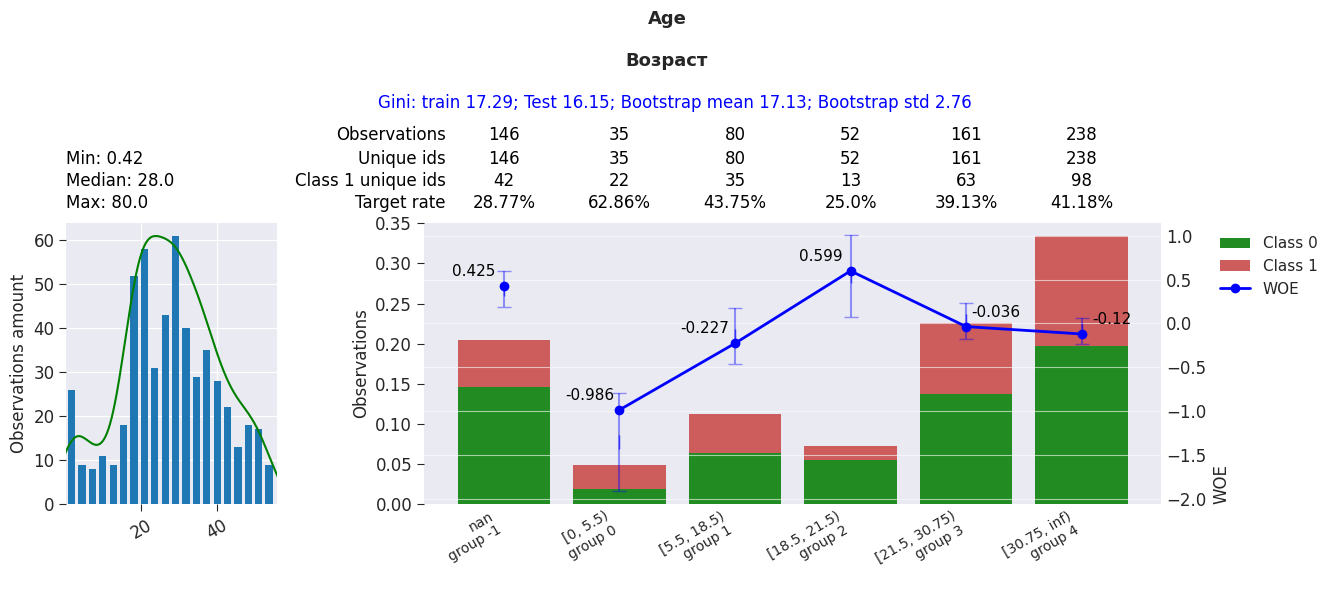

In [11]:
binning.merge('Age',                              # переменная
              groups_list=[4, 5],                 # [group1, group2] - список из двух бинов для объединения
              plot_flag=True                      # флаг вывода графика после разделения
             )

#### 4.3.4 Сплит бина 3 деревом с min_samples_leaf 10% от размера выборки

Splitting started! Feature Age group: 3
Additional bound  24.25


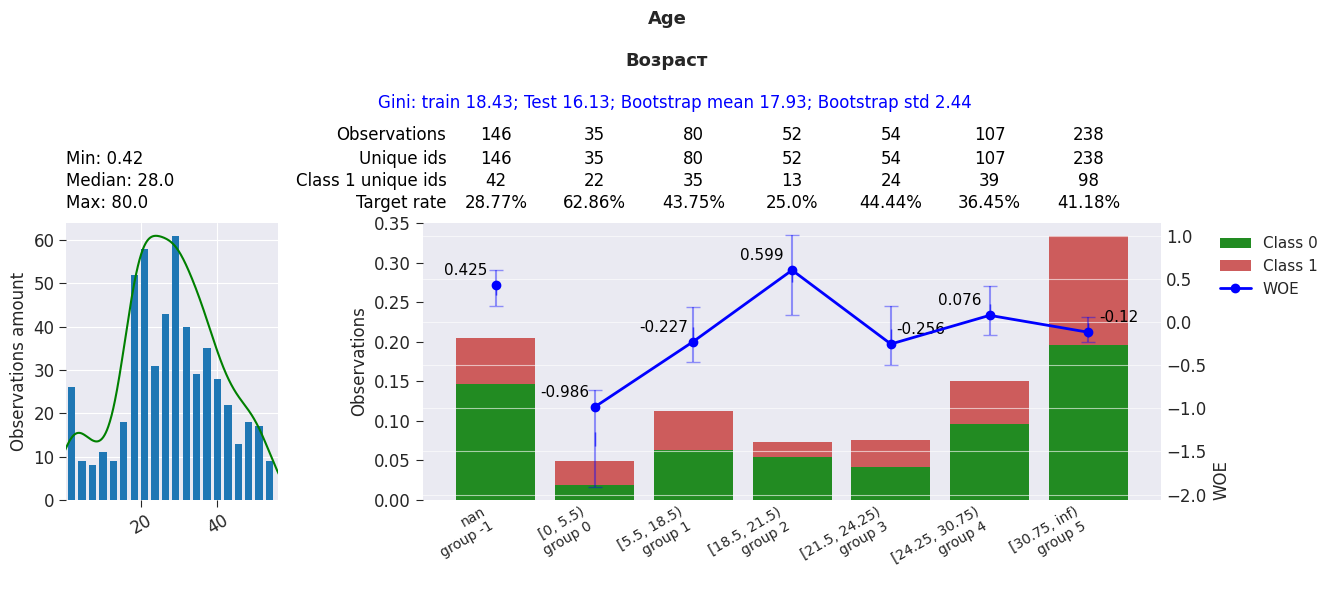

In [12]:
binning.split('Age',                              # переменная
              group=3,                            # номер бина для разделения, начиная с 0
              to_add=None,                        # для числовых - граница между бинами, для категориальных - список значений для выделения в новый бин
              min_bin_size=0.05,                  # минимальное число (доля) наблюдений в каждом бине
              criterion='entropy',                # критерий расщепления. Варианты значений: 'entropy', 'gini'
              scoring='neg_log_loss',             # критерий расщепления. Варианты значений: 'entropy', 'gini'
              plot_flag=True                      # флаг вывода рисунка после разделения
             )

#### 4.3.5 Откат последнего изменения

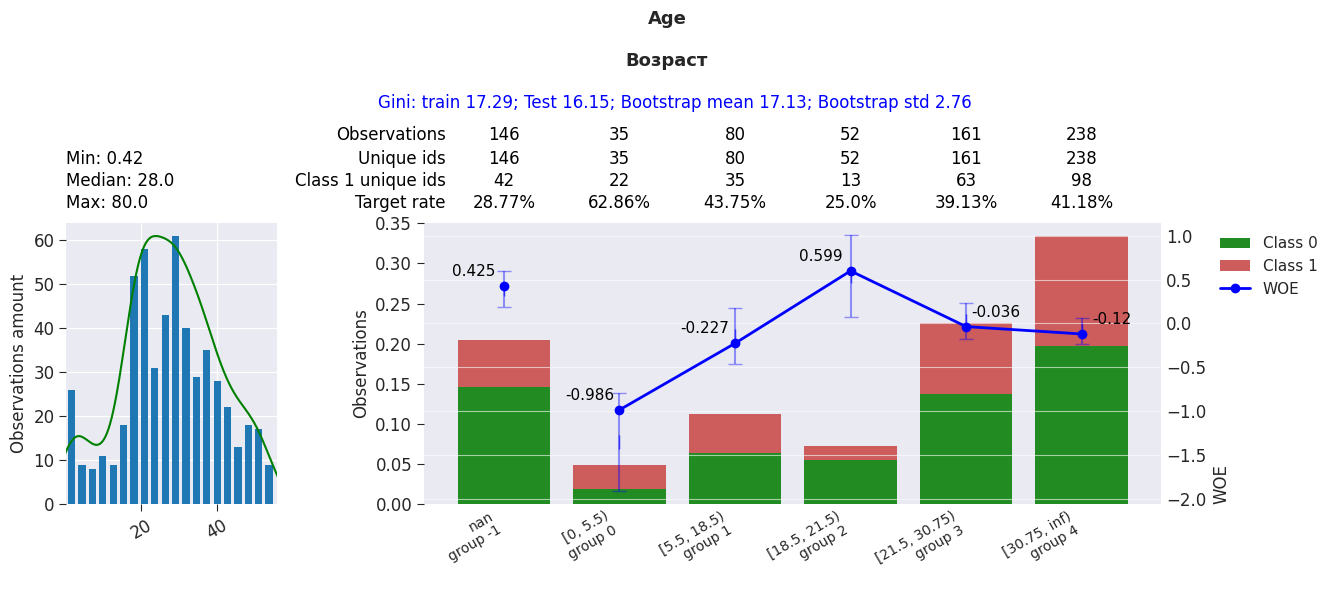

In [13]:
binning.rollback('Age',                         # переменная
                 iteration=-2,                  # номер итерации. Возможны отрицательные значения: -1 - последняя итерация, -2 - предпоследняя и т.д.
                 plot_flag=True                 # флаг вывода графика после отката
                ) 

#### 4.3.6 Ручная установка бинов

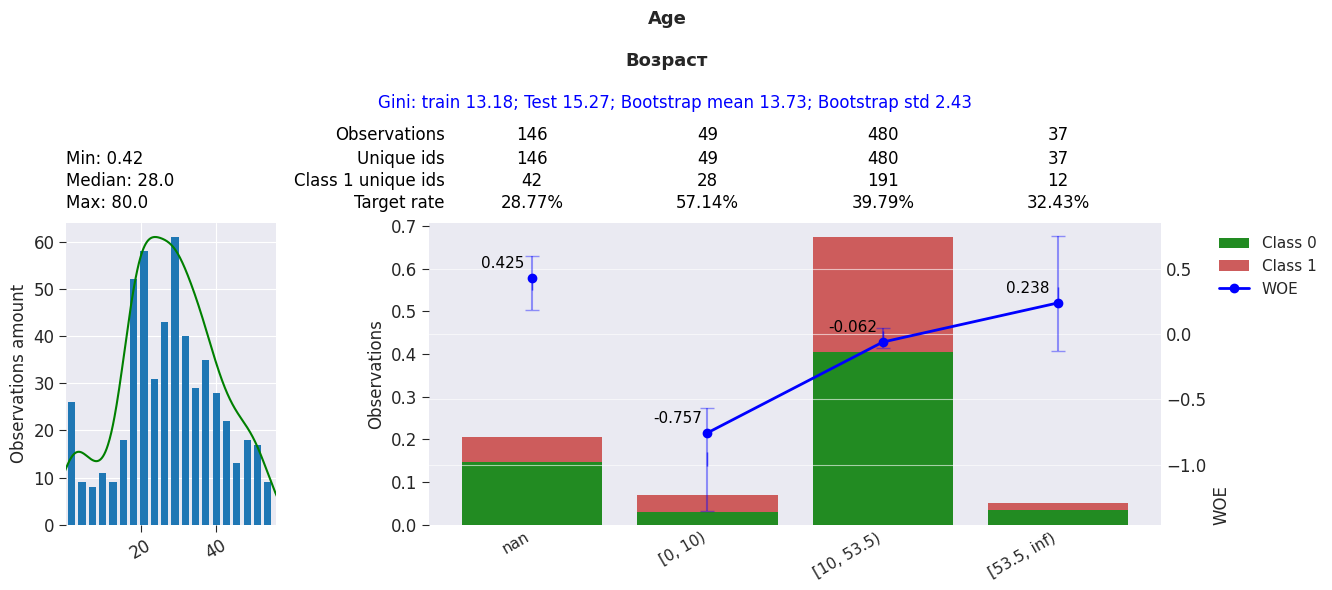

[<Figure size 1350x600 with 4 Axes>]

In [14]:
binning.feature_woes['Age'].groups = {-1: np.nan, 0: [0, 10], 1: [10, 53.5], 2: [53.5, np.inf]}
binning.feature_woes['Age'].fit(new_groups=False)
binning.plot_bins(['Age'])

### 4.4. Сохранение корректировок

In [15]:
binning.export_scorecard(out=f'{result_folder}/scorecard_corr.xlsx', # название файла
                        features=None,                               # список переменных для сохранения. При None сохраняются все, имеющие активный биннинг
                        history=True                                 # сли True, то сохраняется вся история биннингов. Дубли биннингов удаляются, текущий биннинг записывается последней итерацией
                        )                       

,feature,categorical_type,group,values,woe,missing,n,n0,n1,target_rate,sample_part,n0_part,n1_part,iteration
0,Pclass,int64,0,[3],0.722,0,389.0,299.0,90.0,0.231,0.546,0.681,0.330,0
1,Pclass,int64,1,[2],-0.449,0,150.0,76.0,74.0,0.493,0.211,0.173,0.271,0
2,Pclass,int64,2,[1],-1.004,0,173.0,64.0,109.0,0.630,0.243,0.146,0.399,0
3,Pclass,int64,others,all others,0.722,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Sex,object,0,[male],0.993,0,461.0,375.0,86.0,0.187,0.647,0.854,0.315,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Fare,,others,all others,1.360,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
65,Embarked,object,0,[S],0.151,1,520.0,339.0,181.0,0.348,0.730,0.772,0.663,0
66,Embarked,object,1,[Q],0.019,0,61.0,38.0,23.0,0.377,0.086,0.087,0.084,0
67,Embarked,object,2,[C],-0.581,0,131.0,62.0,69.0,0.527,0.184,0.141,0.253,0


## 5. Многофакторный анализ
### 5.1. Создание объекта класса модели LogisticRegressionModel

In [16]:
logreg = LogisticRegressionModel(clf=LogisticRegression(random_state=42, C=1000, solver='saga', penalty='l2'),  # классификатор модели (должен иметь метод fit() и атрибуты coef_, intercept_). 
                                                                                                                # При None выбирается SGDClassifier(alpha=0.001, loss='log', max_iter=100)
                                 transformer=binning, # объект класса WOE для предварительной трансформации факторов
                                 ds=None,             # Привязанный к модели ДатаСэмпл. Если задан, то он по умолчанию будет использоваться во всех методах
                                 round_digits=3,      # округление коэффициентов до этого кол-ва знаков после запятой   
                                 name='Titanic',      # название модели
                                )  

Chosen model classifier is LogisticRegression(C=1000, random_state=42, solver='saga')


### 5.2. Выполнение многофакторного отбора
Проходит в 4 основных этапа:
1) Отбор по джини (исключаются все факторы с джини ниже gini_threshold)
2) Корреляционный анализ. Доступны два варианта работы: <br>
&emsp;&emsp; drop_with_most_correlations=False - итерационно исключается фактор с наименьшим джини из списка коррелирующих факторов<br>
&emsp;&emsp; drop_with_most_correlations=True - итерационно исключается фактор с наибольшим кол-вом коррелирующих с ним факторов
3) Итерационный отобор. Доступны три типа отбора:<br>
&emsp;&emsp; selection_type='forward' - все доступные факторы помещаются в список кандидатов, на каждом шаге из списка кандидатов определяется лучший* фактор и перемещается в модель<br>
&emsp;&emsp; selection_type='backward' - в модель включаются все доступные факторы, затем на каждом шаге исключается худший* фактор<br>
&emsp;&emsp; selection_type='stepwise' - комбинация 'forward' и 'backward'. Каждый шаг состоит из двух этапов:<br>
&emsp;&emsp;&emsp;&emsp; на первом из списка кандидатов отбирается лучший* фактор в модель,<br>
&emsp;&emsp;&emsp;&emsp; на втором из уже включенных факторов выбирается худший* и исключается<br>
           
&emsp;&emsp; *Определение лучшего фактора:<br>
&emsp;&emsp;&emsp;&emsp; При pvalue_priority=False лучшим фактором считается тот, который увеличивает метрику scoring модели на наибольшую величину.<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Если величина такого увеличения ниже score_delta, то лучший фактора не определяется, и добавления не происходит<br>
&emsp;&emsp;&emsp;&emsp; При pvalue_priority=True лучшим фактором считается фактор, который после добавления в модель имеет наименьшее p-value.<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Если величина этого p-value выше pvalue_threshold, то лучший фактора не определяется, и добавления не происходит<br>
        
&emsp;&emsp; *Определение худшего фактора:<br>
&emsp;&emsp;&emsp;&emsp; Худшим фактором в модели считается фактор с наибольшим p-value.<br>
&emsp;&emsp;&emsp;&emsp; Если величина этого p-value ниже pvalue_threshold, то худший фактора не определяется, и исключения не происходит<br>
4) Если выставлен флаг drop_positive_coefs=True, то из списка отобранных на этапе 3 факторов исключаются факторы с положительным коэффициентом


------------------------------------------------------------------------ MFA -------------------------------------------------------------------------

Transforming features...

---------------------------------------------- Step 1 ----------------------------------------------
Dropped features with gini lower 5: []

---------------------------------------------- Step 2 ----------------------------------------------
Dropped correlated features: ['Pclass_WOE']

---------------------------------------------- Step 3 ----------------------------------------------
Stepwise feature selection started...
To add: Sex_WOE, gini: 53.931, p-value: 7.90717152914925e-42
To add: Fare_WOE, gini: 67.161, p-value: 4.808528967741836e-13
To add: Age_WOE, gini: 68.029, p-value: 0.034841933473333135
To add: SibSp_WOE, gini: 68.435, p-value: 0.002582852849726728
To add: Embarked_WOE, gini: 68.547, p-value: 0.048851653015884136
No significant features to add were found


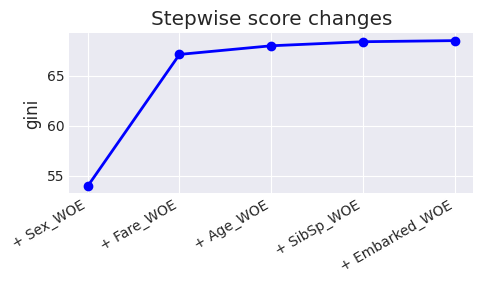


---------------------------------------------- Step 4 ----------------------------------------------
Dropping features with positive coefs and high p-values...
Nothing to drop

------------------------------------------- Final model --------------------------------------------
intercept = -0.486
coefs = {'SibSp_WOE': -0.597, 'Sex_WOE': -0.945, 'Fare_WOE': -0.732, 'Embarked_WOE': -0.704, 'Age_WOE': -0.846}
Generating report...


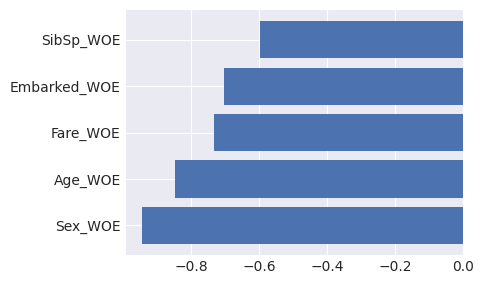

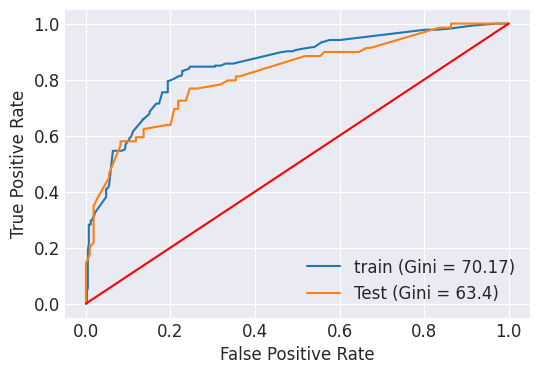

      train  Test  Bootstrap mean  Bootstrap std
Gini  70.17  63.4           69.29           2.31


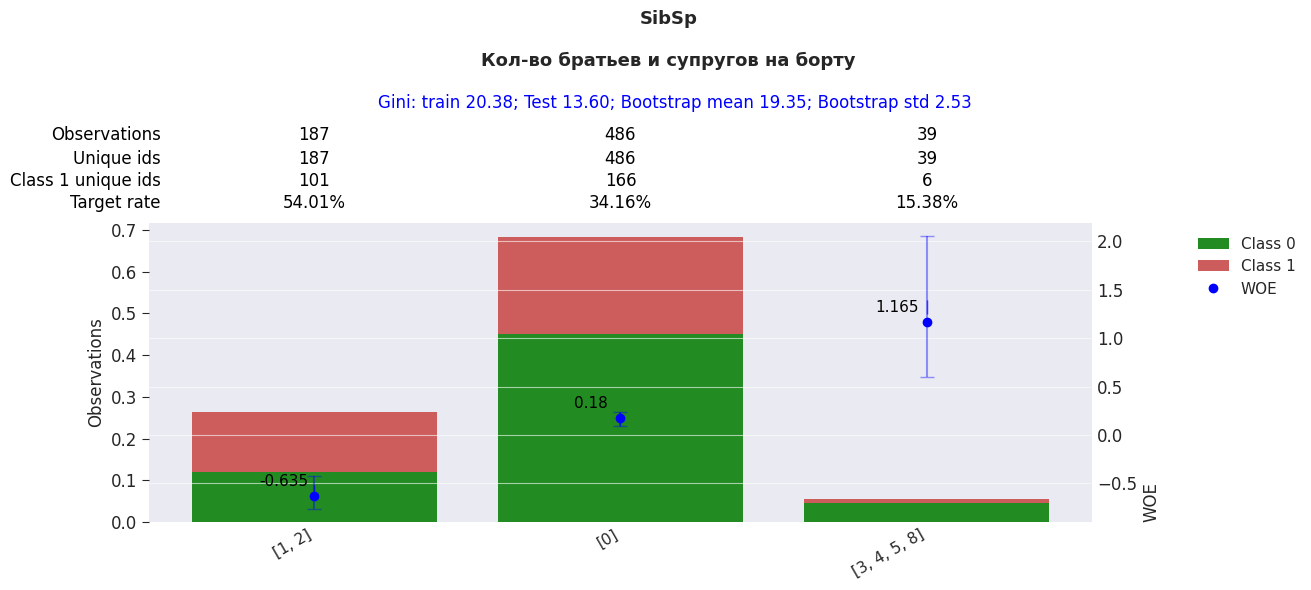

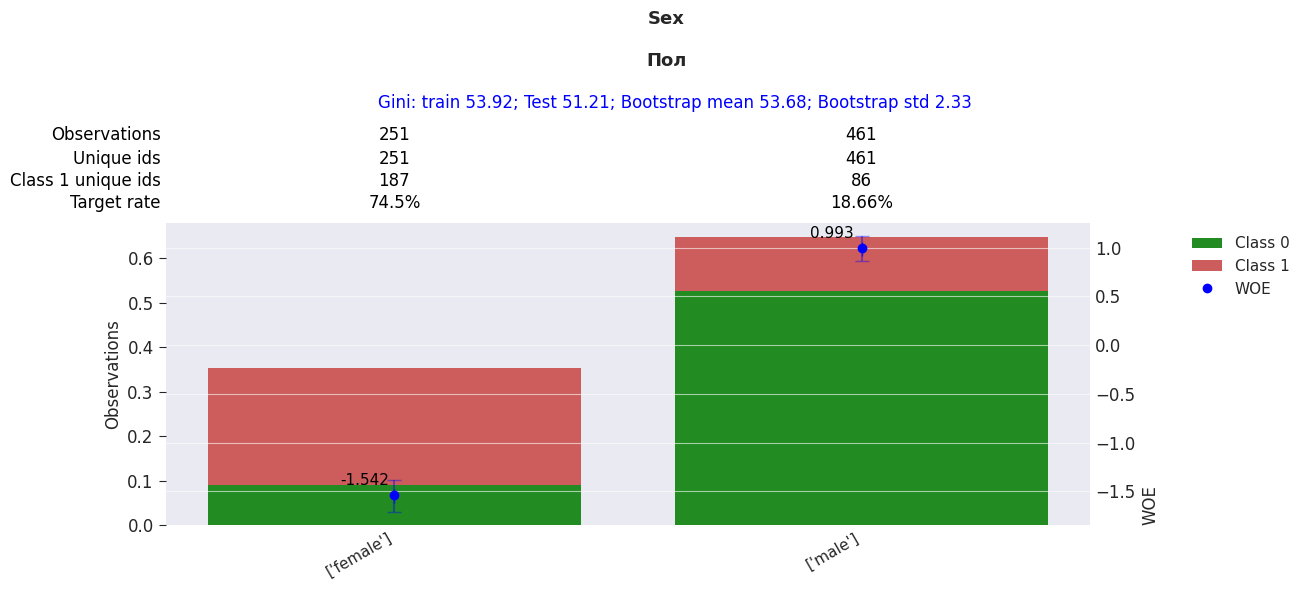

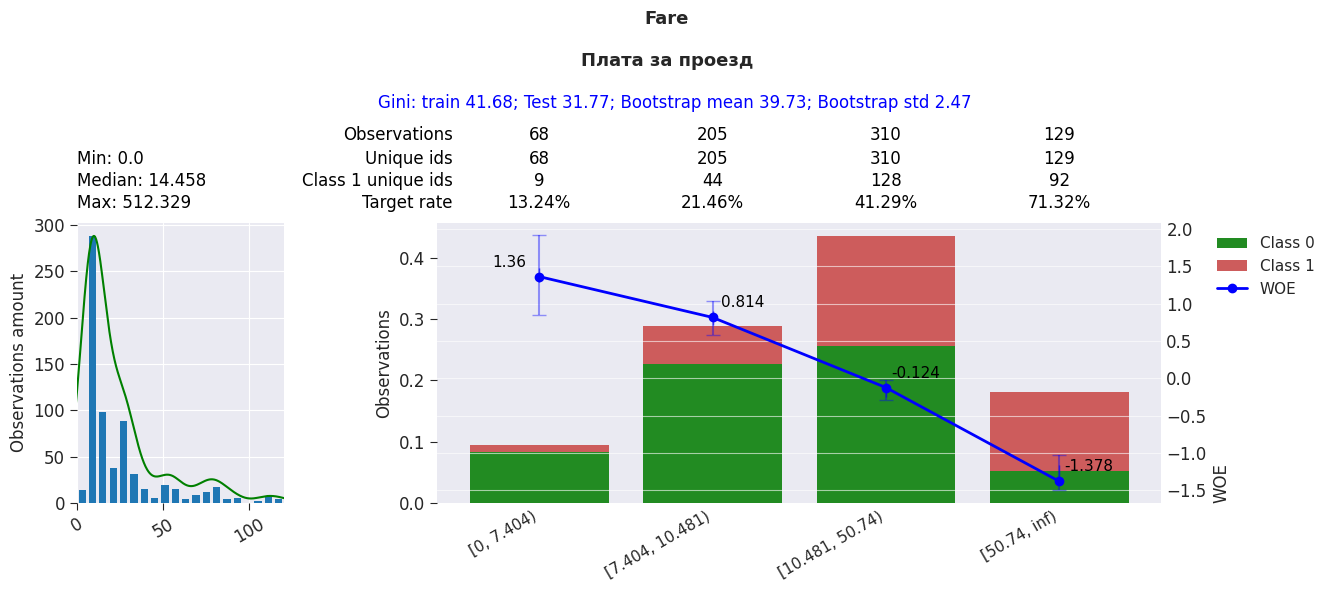

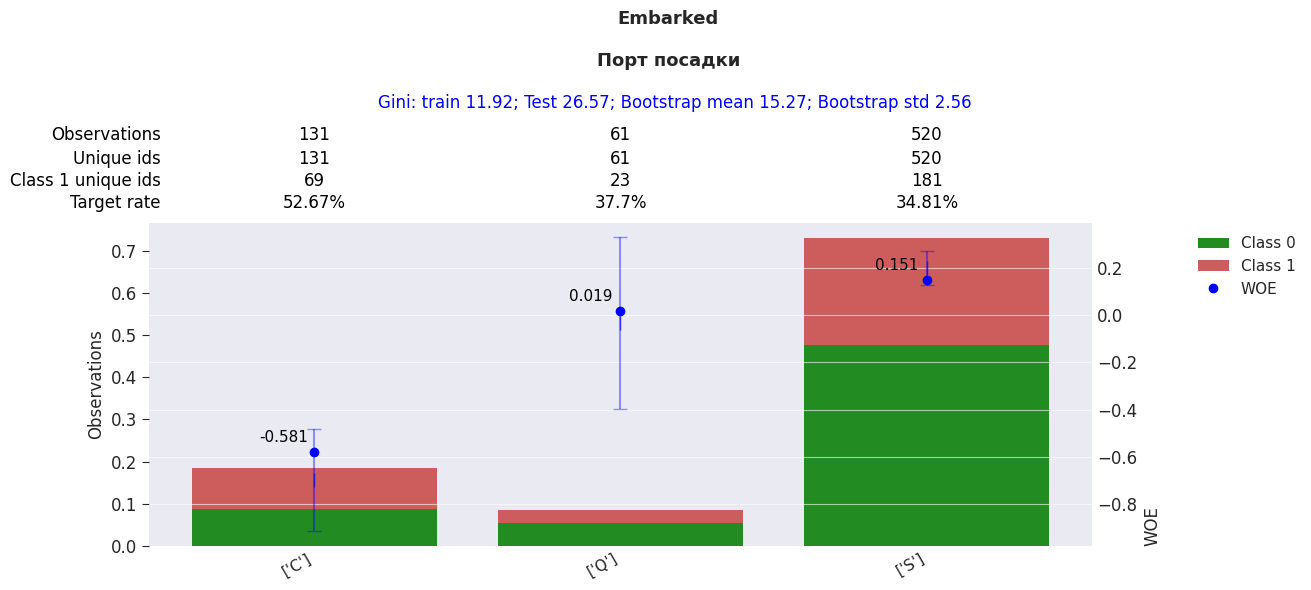

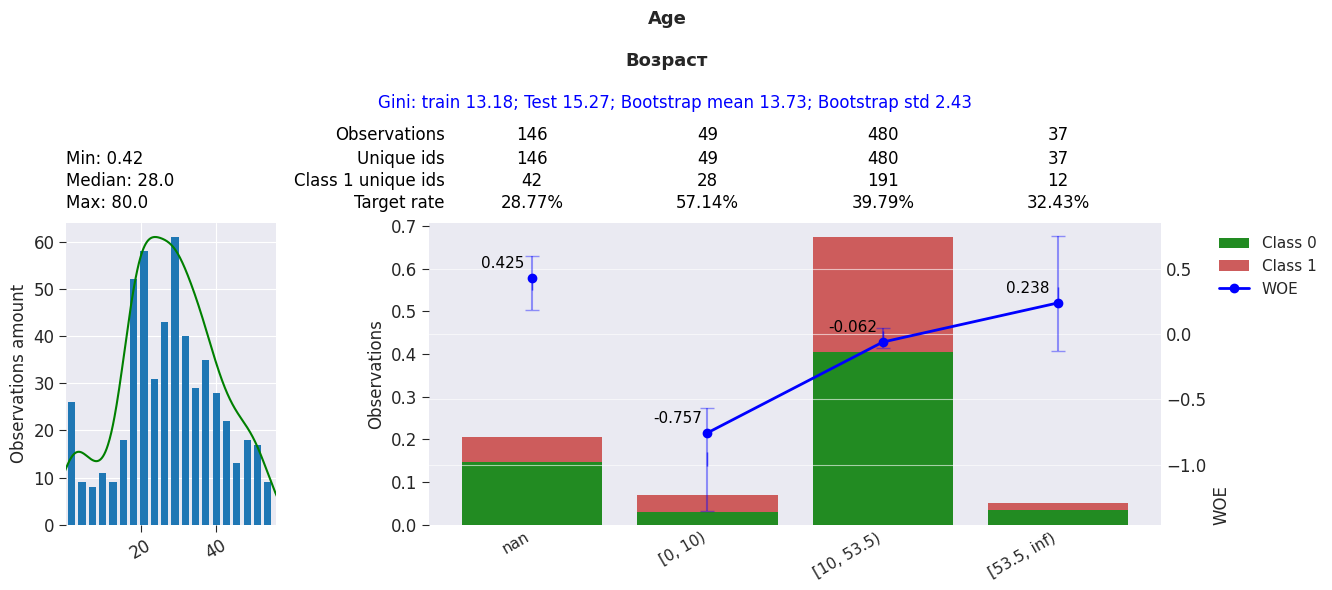

In [17]:
logreg.mfa(ds,                                   # ДатаСэмпл. В случае, если он не содержит трансформированные переменные, то выполняется трансформация трансформером self.transformer. При None берется self.ds
           features=None,                        # исходный список переменных для МФА. При None берутся все переменные, по которым есть активный биннинг
           hold=None,                            # список переменных, которые обязательно должны войти в модель
           features_ini=None,                    # список переменных, с которых стартует процедура отбора. Они могут быть исключены в процессе отбора
           limit_to_add=100,                     # максимальное кол-во переменных, которые могут быть добавлены к модели
           gini_threshold=5,                     # граница по джини для этапа 1
           corr_method='pearson',                # метод расчета корреляций для этапа 2. Доступны варианты 'pearson', 'kendall', 'spearman'
           corr_threshold=0.70,                  # граница по коэффициенту корреляции для этапа 2
           drop_with_most_correlations=False,    # вариант исключения факторов в корреляционном анализе для этапа 2
           selection_type='stepwise',            # тип отбора для этапа 3
           pvalue_threshold=0.05,                # граница по p-value для этапа 3
           pvalue_priority=False,                # вариант определения лучшего фактора для этапа 3
           scoring='gini',                       # максимизируемая метрика для этапа 3
                                                 #     Варианты значений: 'gini', 'AIC', 'BIC' + все метрики доступные для вычисления через sklearn.model_selection.cross_val_score.
                                                 #     Все информационные метрики после вычисления умножаются на -1 для сохранения логики максимизации скора.
           score_delta=0.1,                      # минимальный прирост метрики для этапа 3
           cv=None,                              # параметр cv для вычисления скора sklearn.model_selection.cross_val_score для этапа 3. 
                                                 #     При None берется StratifiedKFold(5, shuffle=True, random_state=self.random_state)
           drop_positive_coefs=True,             # флаг для выполнения этапа 4
           
           # --- Кросс переменные ---
           crosses_simple=True,                  # True  - после трансформации кросс-переменные учавствут в отборе наравне со всеми переменными
                                                 # False - сначала выполняется отбор только на основных переменных,
                                                 #     затем в модель добавляются по тем же правилам кросс переменные, но не более, чем crosses_max_num штук
           crosses_max_num=10,                   # максимальное кол-во кросс переменных в модели. учитывается только при crosses_simple=False
           
           # --- Отчет ---
           verbose=True,                         # флаг для вывода подробных комментариев в процессе работы
           result_file='mfa.xlsx',               # файл, в который будут сохраняться результаты мфа
           metrics=None,                         # список метрик/тестов, результы расчета которых должны быть включены в отчет.
                                                 #     Элементы списка могут иметь значения (не чувствительно к регистру):
                                                 #         'ontime': расчет динамики джини по срезам,
                                                 #         'vif'   : расчет Variance Inflation Factor,
                                                 #         'psi'   : расчет Population Population Stability Index,
                                                 #         'wald'  : тест Вальда,
                                                 #         'ks'    : тест Колмогорова-Смирнова,
                                                 #         func    : пользовательская функция, которая принимает целевую и зависимую переменную,
                                                 #                   и возвращает числовое значение метрики
                                                 #                   Например,
                                                 #                   def custom_metric(y_true, y_pred):
                                                 #                       from sklearn.metrics import roc_curve, f1_score
                                                 #                       fpr, tpr, thresholds = roc_curve(y_true, y_pred)
                                                 #                       thres = thresholds[np.argmax(tpr * (1 - fpr))]
                                                 #                       return f1_score(y_true, (y_pred > thres).astype(int))
                                                 #                   metrics = ['vif', 'ks', 'psi', custom_metric]
           metrics_cv=None                       # список метрик, рассчитываемых через sklearn.model_selection.cross_val_score.
                                                 #     Аналогично параметру metrics элементами могут быть строки, поддерживаемые cross_val_score, либо пользовательские функции
                                                 #     Например, ['roc_auc', 'neg_log_loss', 'gini', 'f1', 'accuracy', custom_metric]
          )

### 5.3. Сохранение модели

In [18]:
logreg.save_model(file_name=f'{result_folder}/model.json'   # название json файла для сохранения модели
                 )  

The model was successfully saved to file titanic_output/model.json


## 6. Применение модели
### 6.1. С использованием библиотеки vtb_scorekit

In [19]:
logreg = LogisticRegressionModel()
logreg.load_model(file_name=f'{result_folder}/model.json')
logreg.scoring(df,                                          # ДатаСэмпл или ДатаФрейм. Возвращается объект того же типа
               score_field='score',                         # поле, в которое должен быть записан посчитанный скор
               pd_field='prob',                             # поле, в которое должен быть записан посчитанный PD
               scale_field=None                             # поле, в которое должен быть записан посчитанный грейд
              )                           

Chosen model classifier is SGDClassifier(alpha=0.001, loss='log', random_state=0)
The model was loaded from file titanic_output/model.json
clf = LogisticRegression(C=1000, random_state=42, solver='saga')
name = Titanic
coefs = {'SibSp_WOE': -0.597, 'Sex_WOE': -0.945, 'Fare_WOE': -0.732, 'Embarked_WOE': -0.704, 'Age_WOE': -0.846}
intercept = -0.486
calibration = None
scale = None
round_digits = 3


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_WOE,SibSp_WOE,Embarked_WOE,Sex_WOE,Fare_WOE,score,prob
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S,-0.062,-0.635,0.151,0.993,1.360,-2.095,0.110
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C,-0.062,-0.635,-0.581,-1.542,-1.378,2.820,0.944
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,-0.062,0.180,0.151,-1.542,0.814,0.214,0.553
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S,-0.062,-0.635,0.151,-1.542,-1.378,2.305,0.909
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S,-0.062,0.180,0.151,0.993,0.814,-2.182,0.101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S,-0.062,0.180,0.151,0.993,-0.124,-1.495,0.183
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S,-0.062,0.180,0.151,-1.542,-0.124,0.901,0.711
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S,0.425,-0.635,0.151,-1.542,-0.124,0.975,0.726
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C,-0.062,0.180,-0.581,0.993,-0.124,-0.980,0.273


### 6.2. Генерация хардкода для использования модели без сторонних библиотек

In [20]:
logreg.to_py(file_name=f'{result_folder}/titanic_model.py', # название питоновского файла, куда должен быть сохранен код
             score_field='score',                           # поле, в которое должен быть записан посчитанный скор
             pd_field='prob',                               # поле, в которое должен быть записан посчитанный PD
             scale_field=None                               # поле, в которое должен быть записан посчитанный грейд
            )

The model code for implementation saved to file titanic_output/titanic_model.py
import pandas as pd
import numpy as np


def scoring(df, score_field='score', pd_field='pd', scale_field=None):
    """
    Функция скоринга выборки
    Arguments:
        df: [pd.DataFrame] входной ДатаФрейм, должен содержать все нетрансформированные переменные модели
        score_field: [str] поле, в которое должен быть записан посчитанный скор
        pd_field: [str] поле, в которое должен быть записан посчитанный PD
        scale_field: [str] поле, в которое должен быть записан посчитанный грейд
    Returns:
        df: [pd.DataFrame] выходной ДатаФрейм с добавленными полями трансформированных переменных, скоров, PD и грейда
    """

    df['SibSp_WOE'] = np.where(df['SibSp'].isin([3, 4, 5, 8]), 1.165, 
                               np.where(df['SibSp'].isin([0]), 0.18, 
                                        np.where(df['SibSp'].isin([1, 2]), -0.635, 
                                                